___
# Simulação de Monte Carlo Aplicada a GERG-2008 para a fase vapor

In [1]:
# Essencials modules
from GERG2008rho import GERG2008rho # this function is the GERG-2008 to vapor fase
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import findK
from tqdm import tqdm
import time


# matplotlib notebook
#%matplotlib ipympl
#%matplotlib qt

# figure options
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['figure.autolayout'] = True
plt.rcParams['text.usetex'] = True

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

___
## Variáveis de entrada

* c: Lista contendo a proporção molar de cada componente da mistura. A soma das proporções molares deve ser igual a um, ou seja: 

    $\LARGE\sum_ {i=0} ^ n c_i = 1 $
        
* T: Temperatura em Kelvin (K)

* p: Pressão absoluta em quilopascal (kPa)


In [6]:
# Molar composition
c = np.zeros((2,21))

# Multicomponents mixture from Baladão's dissertation.
# Mixture N1 → c0
c[0][0 ] = 0.34242        # Methane
c[0][1 ] = 0.00000        # Nitrogen
c[0][2 ] = 0.00000        # CO2
c[0][3 ] = 0.31372        # Ethane
c[0][4 ] = 0.34386        # Propane
c[0][5 ] = 0.00000        # Isobutane
c[0][6 ] = 0.00000        # Butane
c[0][7 ] = 0.00000        # Isopentane
c[0][8 ] = 0.00000        # Pentane
c[0][9 ] = 0.00000        # Hexane
c[0][10] = 0.00000        # Heptane
c[0][11] = 0.00000        # Octane
c[0][12] = 0.00000        # Nonane
c[0][13] = 0.00000        # Decane
c[0][14] = 0.00000        # Hydrogen
c[0][15] = 0.00000        # Oxygen
c[0][16] = 0.00000        # CO
c[0][17] = 0.00000        # Water
c[0][18] = 0.00000        # H2S
c[0][19] = 0.00000        # Helium
c[0][20] = 0.00000        # Argon

# Mixture N2 → c1
c[1][0 ] = 0.85260        # Methane
c[1][1 ] = 0.04840        # Nitrogen
c[1][2 ] = 0.00000        # CO2
c[1][3 ] = 0.04830        # Ethane
c[1][4 ] = 0.05070        # Propane
c[1][5 ] = 0.00000        # Isobutane
c[1][6 ] = 0.00000        # Butane
c[1][7 ] = 0.00000        # Isopentane
c[1][8 ] = 0.00000        # Pentane
c[1][9 ] = 0.00000        # Hexane
c[1][10] = 0.00000        # Heptane
c[1][11] = 0.00000        # Octane
c[1][12] = 0.00000        # Nonane
c[1][13] = 0.00000        # Decane
c[1][14] = 0.00000        # Hydrogen
c[1][15] = 0.00000        # Oxygen
c[1][16] = 0.00000        # CO
c[1][17] = 0.00000        # Water
c[1][18] = 0.00000        # H2S
c[1][19] = 0.00000        # Helium
c[1][20] = 0.00000        # Argon

___
## Range de validade da GERG-2008

A GERG-2008 possui um range de validade para temperaturas entre 60 e 700 K e pressão máxima de 70 MPa.
___
## Método da bisseção

Vou utilizar o método da bisseção para obtenção de intervalo de temperaturas no qual as misturas aprensentam a primeira fase líquida.
<img src="bisection.png" width="400" style = "display: block; margin-left: auto; margin-right: auto">

In [7]:
# Pression in kPa
p= 70000       

# Initial gues for the temperature range
interval_T = [[242,238],[170,165]]#,[190,185],[186,182]]

#Bissection method
for i in range(0,len(c)):
    test_c = c[i]
   
    while interval_T[i][0] - interval_T[i][1] > 0.1:
        test_T = (interval_T[i][0]+interval_T[i][1])/2  # pn = (an+bn)/2
        s_roots,k=findK.findK(test_c,p,test_T)
    
        if k > 1:                                       # if   pn → k > 1, an = pn
            interval_T[i][1] = test_T

        elif k == 1:                                    # elif pn → k = 1, bn = pn
            interval_T[i][0] = test_T

In [8]:
interval_T

[[240.375, 240.3125], [168.203125, 168.125]]

## Monte Carlo para a condição de temperatura de 4°C e pressões de 70, 85, 100, 115 e 130 MPa

### Cálculo da massa específica na condição padrão de medição 20°C e 101,325 kPa

In [9]:
# Standard condition
T_standard = 273.15+20  # Temperature in Kelvin
P_standard = 101.325    # Pressure in kPa

rho_standard = []

# Evaluanting for each mixture
for i in range(0,len(c)):
    rho_standard.append(GERG2008rho(c[i],P_standard,T_standard))


### Condição de Distribuição Normal de 4°C e fixo 70 MPa. Condição 00

In [87]:
T0 = 4+273.15 # Temperature in Kelvin
P0 = 70000    # Pressure in kPa
# This function evaluating a normal samples of bounds of P and T values
sigma = 1
ns = 100
mu = T0

samples_n4_70 = (sorted(np.random.normal(mu,sigma,ns).tolist()))

In [88]:
rho_n4_70 = [[] for _ in range(len(c))]

# Evaluanting for each mixture
for i in range(0,len(c)):
    for j, tempo in zip(range(len(samples_n4_70)), tqdm(range(len(samples_n4_70)))):
        rho_n4_70[i].append(GERG2008rho(c[i],P0,samples_n4_70[j]))
        time.sleep(0.1)

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [05:19<00:03,  3.22s/it]


In [89]:
x = [x for x in range(1,101)]

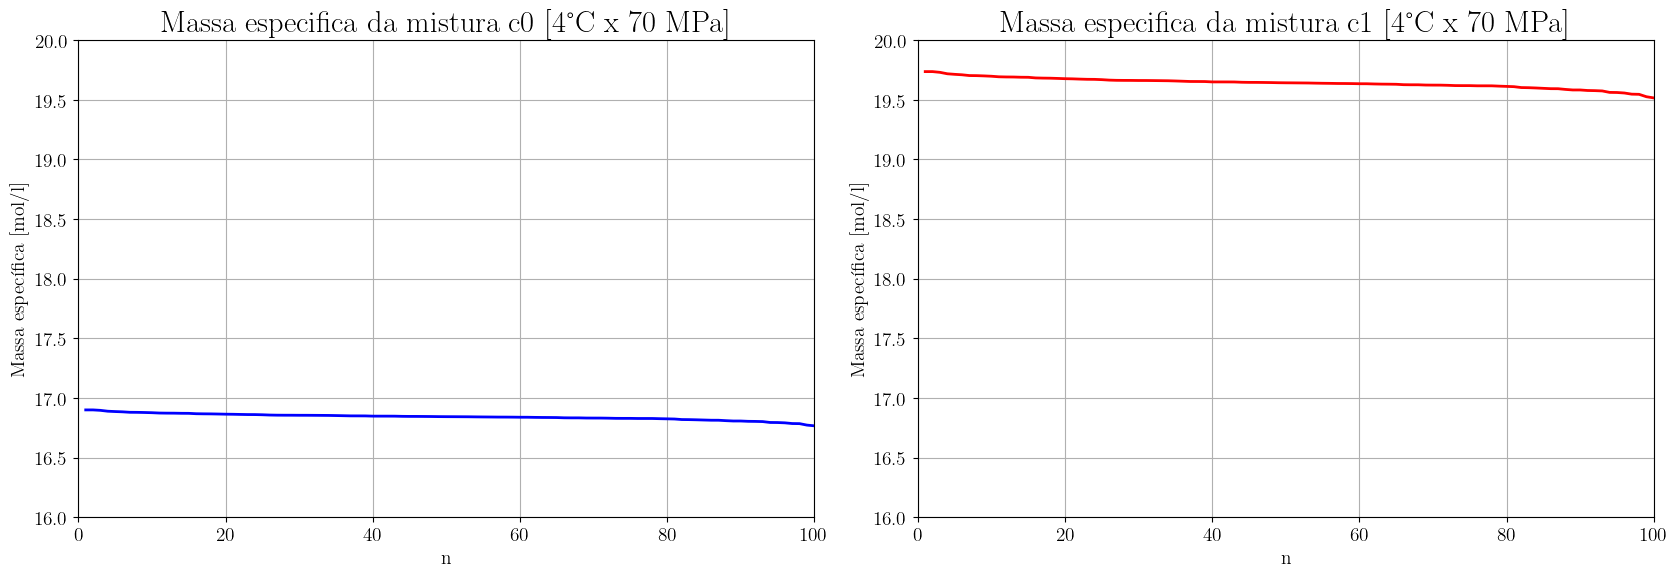

In [90]:
# Ploting a overview for de
fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].plot(x, rho_n4_70[0], 'b', linewidth=2, label ='c0') 
ax[0].grid(visible=True, which='major', axis='both')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([16, 20])
ax[0].set_xlabel('n')
ax[0].set_ylabel('Massa específica [mol/l]')
ax[0].set_title('Massa especifica da mistura c0 [4°C x 70 MPa]')

ax[1].plot(x,rho_n4_70[1], 'r',linewidth=2, label ='c1') 
ax[1].grid(visible=True, which='major', axis='both')
ax[1].set_xlim([0, 100])
ax[1].set_ylim([16, 20])
ax[1].set_xlabel('n')
ax[1].set_ylabel('Massa específica [mol/l]')
ax[1].set_title('Massa especifica da mistura c1 [4°C x 70 MPa]')

plt.show()

Cálculo da incerteza para a condição 00

In [91]:
# Evaluating r
r_00 = []
for i in range(len(rho_standard)):
    r_00.append( rho_n4_70[i]/rho_standard[i])

# Evaluating u_r
ur_00 = []
for i in range(0,len(c)):
    ur_00.append(np.std(r_00[i]))

# For confidence = 95% → 1,96
r95_00 =[[] for _ in range(0,len(c))]
for i in range(len(r_00)):
    for j in range(len(r_00[i])):
        if r_00[i][j] > (np.mean(r_00[i])-1.96*np.std(r_00[i])) or r_00[i][j] < (np.mean(r_00[i])+1.96*np.std(r_00[i])):
            r95_00[i].append(r_00[i][j])

# Evaluating the uncertaninty portion
u_00 = []
for i in range(0,len(c)):
    u_00.append(np.sqrt(np.std(r_00[i])/np.mean(r95_00[i])))

In [92]:
print('Incerteza relativa de r00 para c0 =', round(u_00[0]*100,2),'%')
print('Incerteza relativa de r00 para c0 =', round(u_00[1]*100,2),'%')

Incerteza relativa de r00 para c0 = 3.98 %
Incerteza relativa de r00 para c0 = 4.74 %


Text(0.5, 1.0, 'c1')

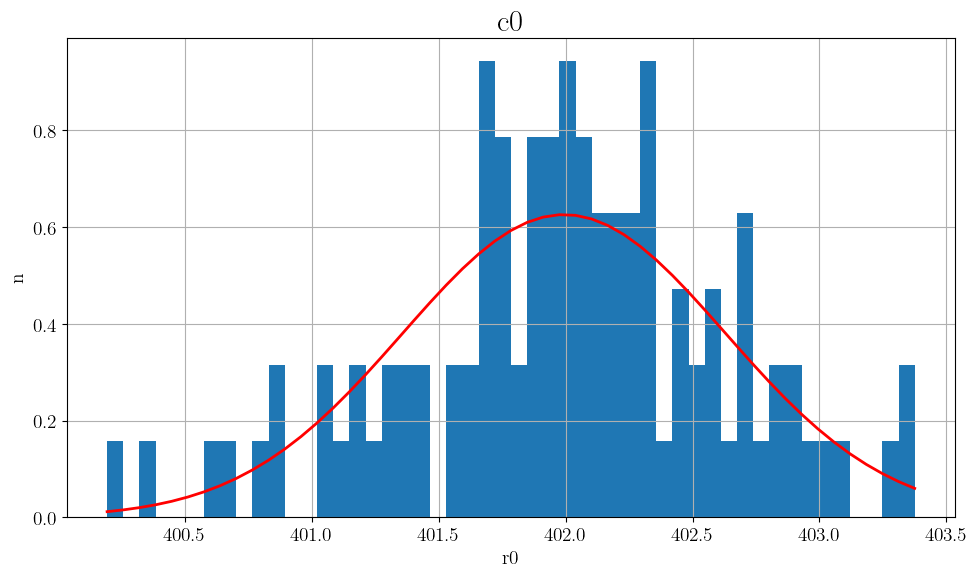

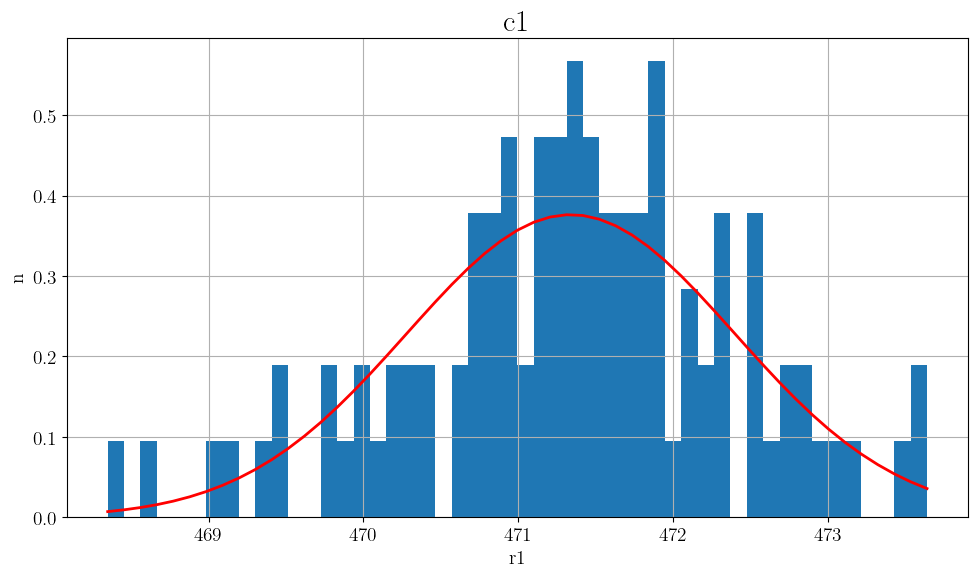

In [93]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_00[0])
sigma = np.std(r95_00[0])
count, bins, ignored = plt.hist(r95_00[0], 50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c0') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r0')
ax.set_ylabel('n')
ax.set_title('c0')

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_00[1])
sigma = np.std(r95_00[1])
count, bins, ignored = plt.hist(r95_00[1], 50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c1') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r1')
ax.set_ylabel('n')
ax.set_title('c1')

### Condição de Distribuição Normal de 4°C e fixo 85 MPa. Condição 01

In [94]:
T0 = 4+273.15 # Temperature in Kelvin
P1 = 85000    # Pressure in kPa
# This function evaluating a normal samples of bounds of P and T values
sigma = 1
ns = 100
mu = T0

samples_n4_85 = (sorted(np.random.normal(mu,sigma,ns).tolist()))

In [95]:
rho_n4_85 = [[] for _ in range(len(c))]

# Evaluanting for each mixture
for i in range(0,len(c)):
    for j, tempo in zip(range(len(samples_n4_85)), tqdm(range(len(samples_n4_85)))):
        rho_n4_85[i].append(GERG2008rho(c[i],P1,samples_n4_85[j]))
        #time.sleep(0.1)

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [05:18<00:03,  3.22s/it]


In [96]:
x = [x for x in range(1,101)]

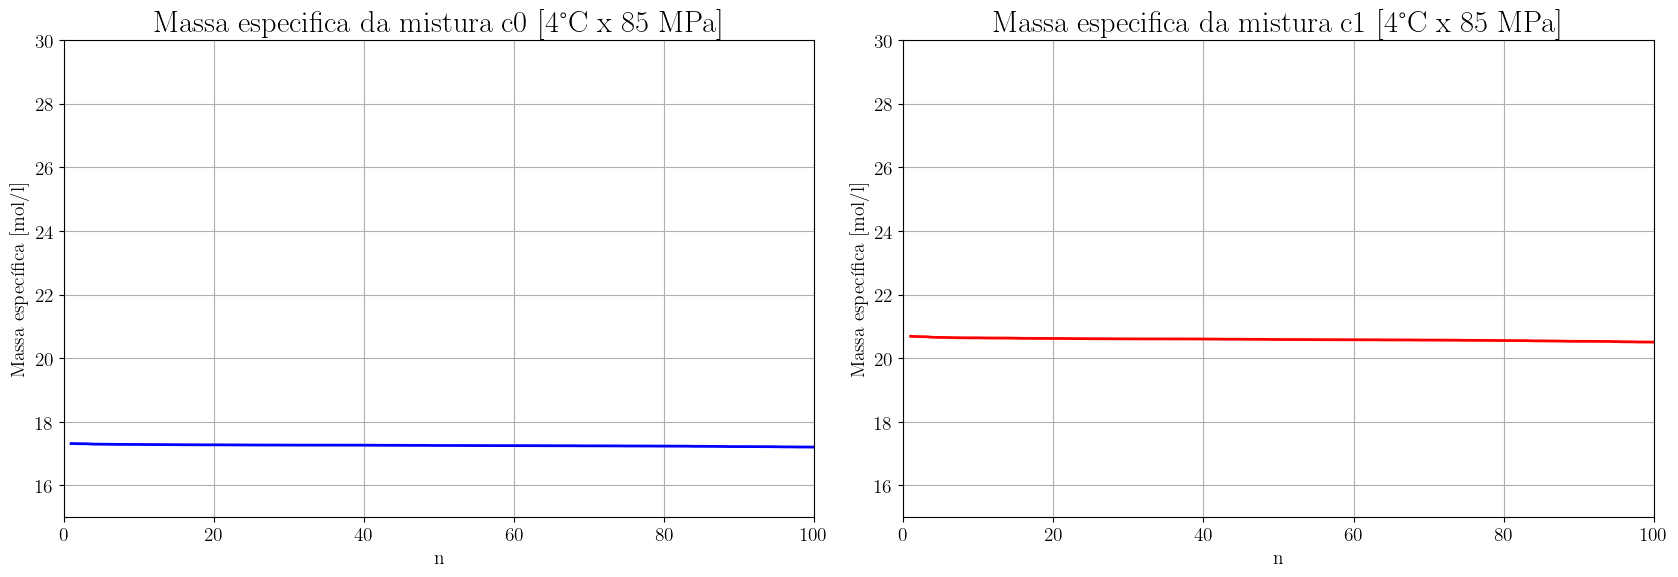

In [97]:
# Ploting a overview for de
fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].plot(x, rho_n4_85[0], 'b', linewidth=2, label ='c0') 
ax[0].grid(visible=True, which='major', axis='both')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([15, 30])
ax[0].set_xlabel('n')
ax[0].set_ylabel('Massa específica [mol/l]')
ax[0].set_title('Massa especifica da mistura c0 [4°C x 85 MPa]')

ax[1].plot(x,rho_n4_85[1], 'r',linewidth=2, label ='c1') 
ax[1].grid(visible=True, which='major', axis='both')
ax[1].set_xlim([0, 100])
ax[1].set_ylim([15, 30])
ax[1].set_xlabel('n')
ax[1].set_ylabel('Massa específica [mol/l]')
ax[1].set_title('Massa especifica da mistura c1 [4°C x 85 MPa]')

plt.show()

In [98]:
# Evaluating r
r_01 = []
for i in range(len(rho_standard)):
    r_01.append( rho_n4_85[i]/rho_standard[i])

# Evaluating u_r
ur_01 = []
for i in range(0,len(c)):
    ur_01.append(np.std(r_01[i]))

# For confidence = 95% → 1,96
r95_01 =[[] for _ in range(0,len(c))]
for i in range(len(r_01)):
    for j in range(len(r_01[i])):
        if r_01[i][j] > (np.mean(r_01[i])-1.96*np.std(r_01[i])) or r_01[i][j] < (np.mean(r_01[i])+1.96*np.std(r_01[i])):
            r95_01[i].append(r_01[i][j])

# Evaluating the uncertaninty portion
u_01 = []
for i in range(0,len(c)):
    u_01.append(np.sqrt(np.std(r_01[i])/np.mean(r95_01[i])))

In [99]:
print('Incerteza relativa de r01 para c0 =', round(u_01[0]*100,2),'%')
print('Incerteza relativa de r01 para c1 =', round(u_01[1]*100,2),'%')

Incerteza relativa de r01 para c0 = 3.74 %
Incerteza relativa de r01 para c1 = 4.37 %


Text(0.5, 1.0, 'c1')

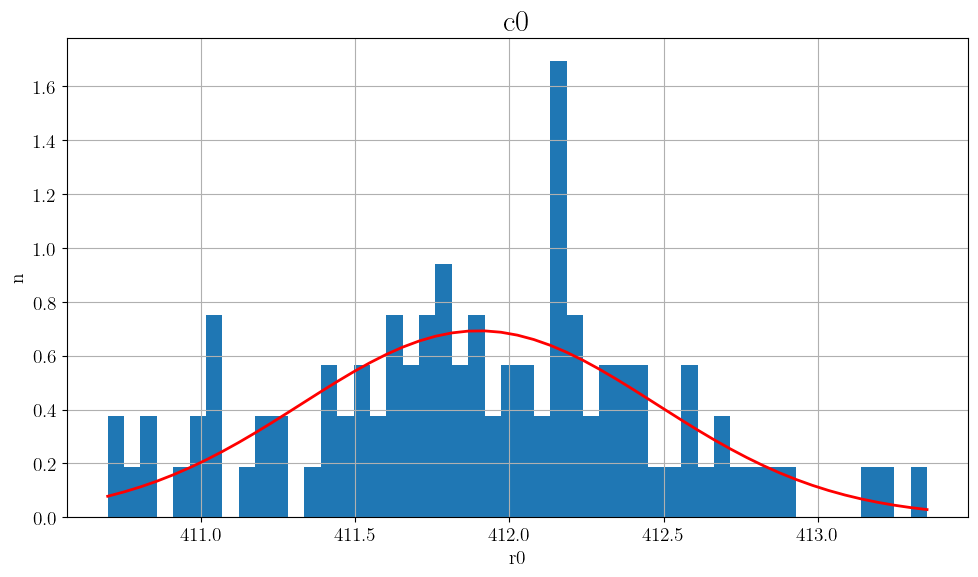

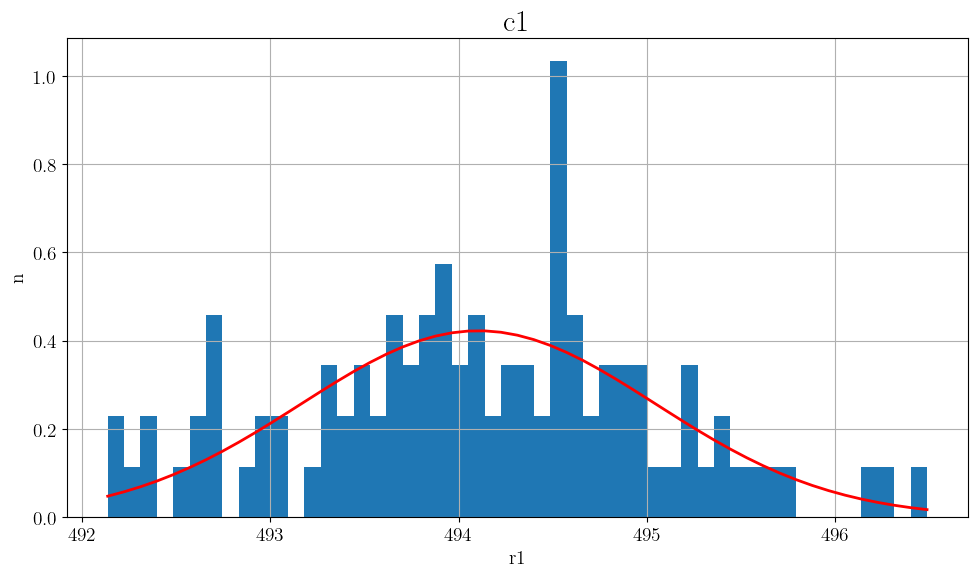

In [100]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_01[0])
sigma = np.std(r95_01[0])
count, bins, ignored = plt.hist(r95_01[0], 50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c0') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r0')
ax.set_ylabel('n')
ax.set_title('c0')

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_01[1])
sigma = np.std(r95_01[1])
count, bins, ignored = plt.hist(r95_01[1], 50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c1') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r1')
ax.set_ylabel('n')
ax.set_title('c1')

### Condição de Distribuição Normal de 4°C e fixo 100 MPa. Condição 02

In [101]:
T0 = 4+273.15 # Temperature in Kelvin
P2 = 100000    # Pressure in kPa
# This function evaluating a normal samples of bounds of P and T values
sigma = 1
ns = 100
mu = T0

samples_n4_100 = (sorted(np.random.normal(mu,sigma,ns).tolist()))

In [102]:
rho_n4_100 = [[] for _ in range(len(c))]

# Evaluanting for each mixture
for i in range(0,len(c)):
    for j, tempo in zip(range(len(samples_n4_100)), tqdm(range(len(samples_n4_100)))):
        rho_n4_100[i].append(GERG2008rho(c[i],P2,samples_n4_100[j]))
        #time.sleep(0.1)

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [05:21<00:03,  3.25s/it]


In [103]:
x = [x for x in range(1,ns+1)]

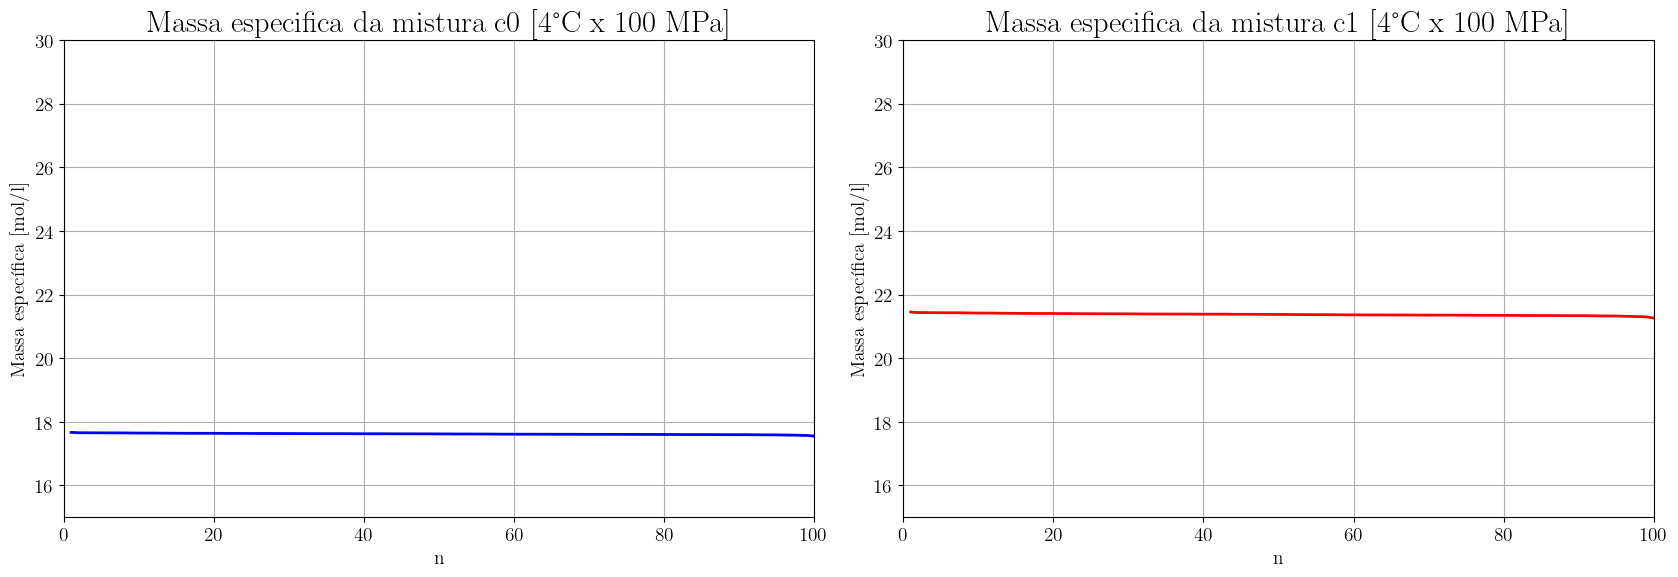

In [104]:
# Ploting a overview for de
fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].plot(x, rho_n4_100[0], 'b', linewidth=2, label ='c0') 
ax[0].grid(visible=True, which='major', axis='both')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([15, 30])
ax[0].set_xlabel('n')
ax[0].set_ylabel('Massa específica [mol/l]')
ax[0].set_title('Massa especifica da mistura c0 [4°C x 100 MPa]')

ax[1].plot(x,rho_n4_100[1], 'r',linewidth=2, label ='c1') 
ax[1].grid(visible=True, which='major', axis='both')
ax[1].set_xlim([0, 100])
ax[1].set_ylim([15, 30])
ax[1].set_xlabel('n')
ax[1].set_ylabel('Massa específica [mol/l]')
ax[1].set_title('Massa especifica da mistura c1 [4°C x 100 MPa]')

plt.show()

In [105]:
# Evaluating r
r_02 = []
for i in range(len(rho_standard)):
    r_02.append( rho_n4_100[i]/rho_standard[i])

# Evaluating u_r
ur_02 = []
for i in range(0,len(c)):
    ur_02.append(np.std(r_02[i]))

# For confidence = 95% → 1,96
r95_02 =[[] for _ in range(0,len(c))]
for i in range(len(r_02)):
    for j in range(len(r_02[i])):
        if r_02[i][j] > (np.mean(r_02[i])-1.96*np.std(r_02[i])) or r_02[i][j] < (np.mean(r_02[i])+1.96*np.std(r_02[i])):
            r95_02[i].append(r_02[i][j])

# Evaluating the uncertaninty portion
u_02 = []
for i in range(0,len(c)):
    u_02.append(np.sqrt(np.std(r_02[i])/np.mean(r95_02[i])))

In [106]:
print('Incerteza relativa de r02 para c0 =', round(u_02[0]*100,2),'%')
print('Incerteza relativa de r02 para c1 =', round(u_02[1]*100,2),'%')

Incerteza relativa de r02 para c0 = 3.44 %
Incerteza relativa de r02 para c1 = 3.96 %


Text(0.5, 1.0, 'c1')

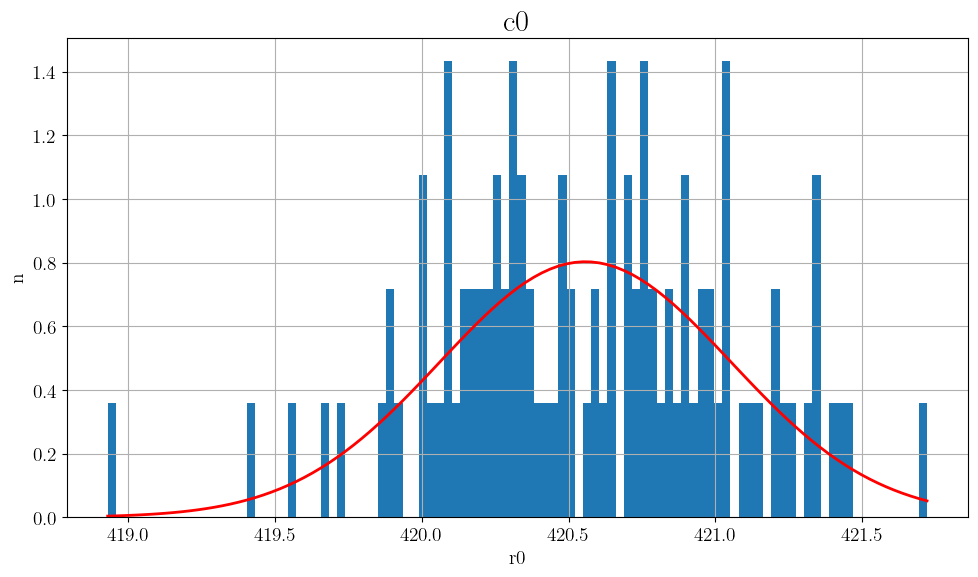

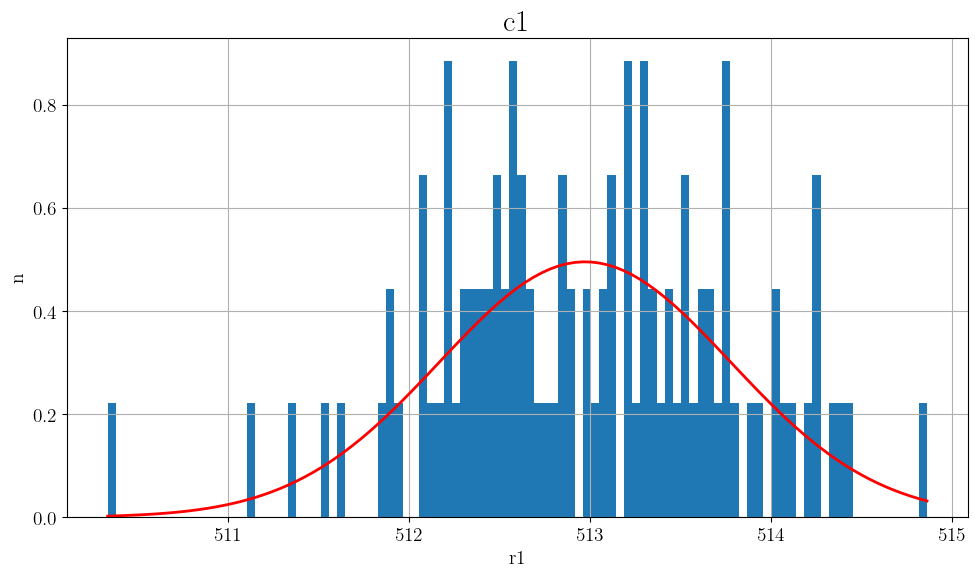

In [107]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_02[0])
sigma = np.std(r95_02[0])
count, bins, ignored = plt.hist(r95_02[0], 100, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c0') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r0')
ax.set_ylabel('n')
ax.set_title('c0')

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_02[1])
sigma = np.std(r95_02[1])
count, bins, ignored = plt.hist(r95_02[1], 100, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c1') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r1')
ax.set_ylabel('n')
ax.set_title('c1')

### Condição de Distribuição Normal de 4°C e fixo 115 MPa. Condição 03

In [108]:
T0 = 4+273.15 # Temperature in Kelvin
P3 = 115000    # Pressure in kPa
# This function evaluating a normal samples of bounds of P and T values
sigma = 1
ns = 100
mu = T0

samples_n4_115 = (sorted(np.random.normal(mu,sigma,ns).tolist()))

In [109]:
rho_n4_115 = [[] for _ in range(len(c))]

# Evaluanting for each mixture
for i in range(0,len(c)):
    for j, tempo in zip(range(len(samples_n4_100)), tqdm(range(len(samples_n4_115)))):
        rho_n4_115[i].append(GERG2008rho(c[i],P3,samples_n4_115[j]))
        #time.sleep(0.1)

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [05:19<00:03,  3.23s/it]


In [110]:
x = [x for x in range(1,ns+1)]

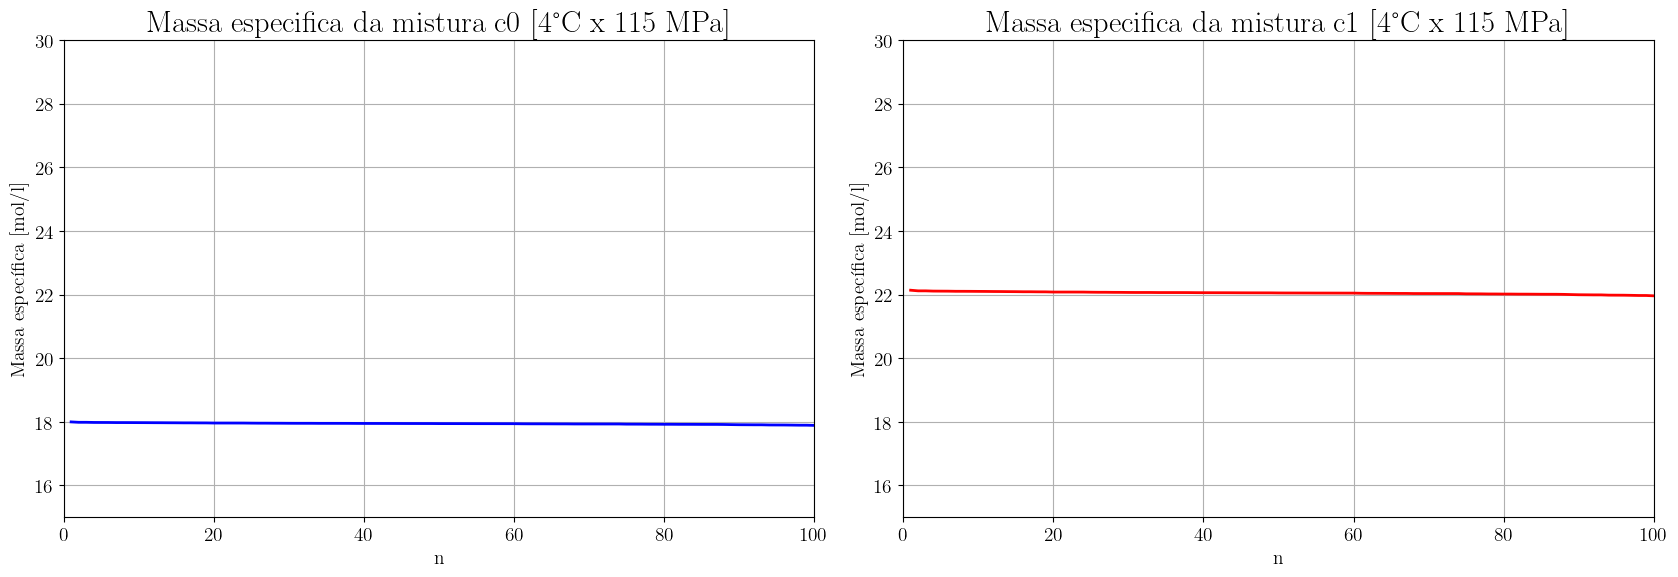

In [111]:
# Ploting a overview for de
fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].plot(x, rho_n4_115[0], 'b', linewidth=2, label ='c0') 
ax[0].grid(visible=True, which='major', axis='both')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([15, 30])
ax[0].set_xlabel('n')
ax[0].set_ylabel('Massa específica [mol/l]')
ax[0].set_title('Massa especifica da mistura c0 [4°C x 115 MPa]')

ax[1].plot(x,rho_n4_115[1], 'r',linewidth=2, label ='c1') 
ax[1].grid(visible=True, which='major', axis='both')
ax[1].set_xlim([0, 100])
ax[1].set_ylim([15, 30])
ax[1].set_xlabel('n')
ax[1].set_ylabel('Massa específica [mol/l]')
ax[1].set_title('Massa especifica da mistura c1 [4°C x 115 MPa]')

plt.show()

In [112]:
# Evaluating r
r_03 = []
for i in range(len(rho_standard)):
    r_03.append( rho_n4_115[i]/rho_standard[i])

# Evaluating u_r
ur_03 = []
for i in range(0,len(c)):
    ur_03.append(np.std(r_03[i]))

# For confidence = 95% → 1,96
r95_03 =[[] for _ in range(0,len(c))]
for i in range(len(r_03)):
    for j in range(len(r_03[i])):
        if r_03[i][j] > (np.mean(r_03[i])-1.96*np.std(r_03[i])) or r_03[i][j] < (np.mean(r_03[i])+1.96*np.std(r_03[i])):
            r95_03[i].append(r_03[i][j])

# Evaluating the uncertaninty portion
u_03 = []
for i in range(0,len(c)):
    u_03.append(np.sqrt(np.std(r_03[i])/np.mean(r95_03[i])))

In [113]:
print('Incerteza relativa de r03 para c0 =', round(u_03[0]*100,2),'%')
print('Incerteza relativa de r03 para c1 =', round(u_03[1]*100,2),'%')

Incerteza relativa de r03 para c0 = 3.6 %
Incerteza relativa de r03 para c1 = 4.11 %


Text(0.5, 1.0, 'c1')

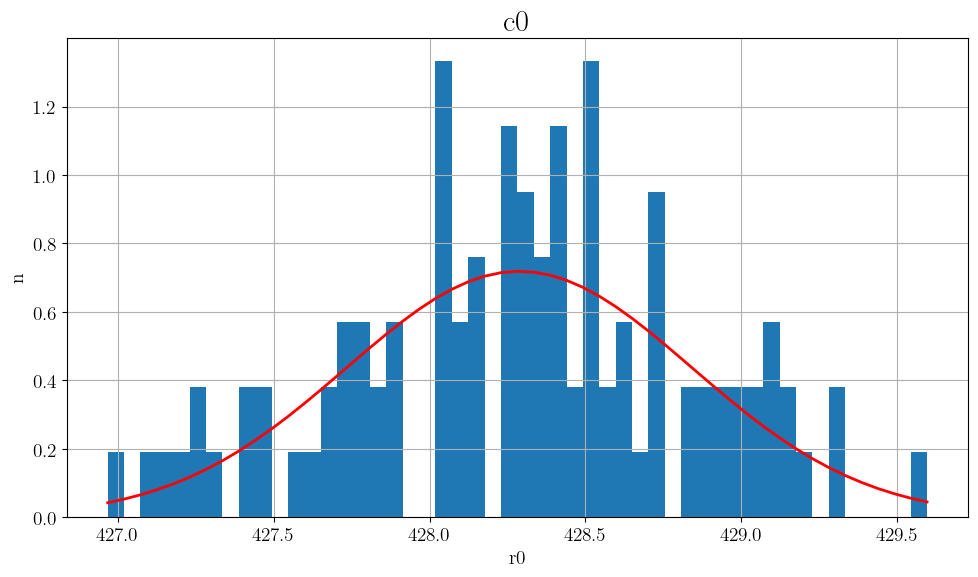

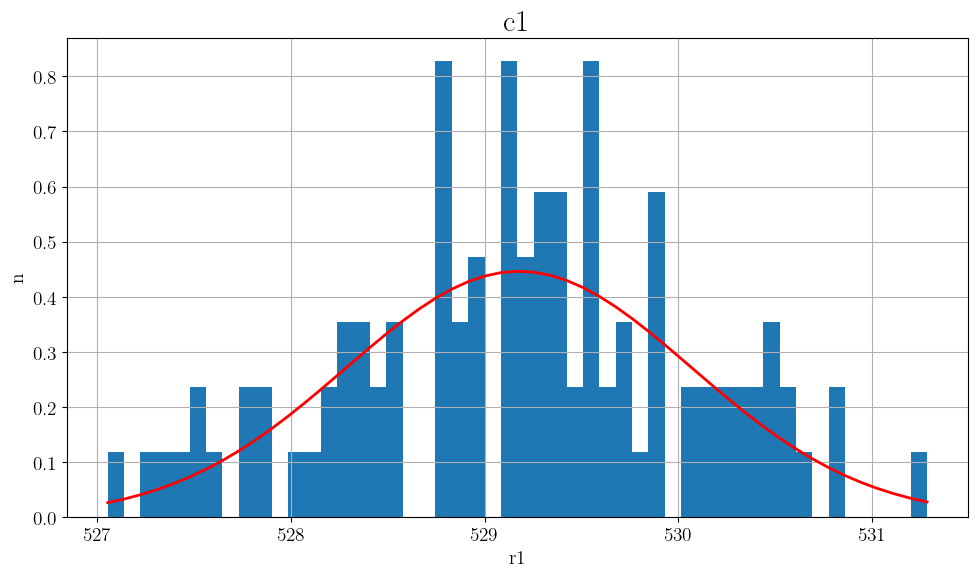

In [114]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_03[0])
sigma = np.std(r95_03[0])
count, bins, ignored = plt.hist(r95_03[0], 50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c0') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r0')
ax.set_ylabel('n')
ax.set_title('c0')

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_03[1])
sigma = np.std(r95_03[1])
count, bins, ignored = plt.hist(r95_03[1],50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c1') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r1')
ax.set_ylabel('n')
ax.set_title('c1')

### Condição de Distribuição Normal de 4°C e fixo 130 MPa. Condição 04

In [115]:
T0 = 4+273.15 # Temperature in Kelvin
P4 = 130000    # Pressure in kPa
# This function evaluating a normal samples of bounds of P and T values
sigma = 1 
ns = 100
mu = T0

samples_n4_130 = (sorted(np.random.normal(mu,sigma,ns).tolist()))

In [116]:
rho_n4_130 = [[] for _ in range(len(c))]

# Evaluanting for each mixture
for i in range(0,len(c)):
    for j, tempo in zip(range(len(samples_n4_130)), tqdm(range(len(samples_n4_130)))):
        rho_n4_130[i].append(GERG2008rho(c[i],P4,samples_n4_130[j]))
        #time.sleep(0.1)

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [05:16<00:03,  3.20s/it]


In [117]:
x = [x for x in range(1,ns+1)]

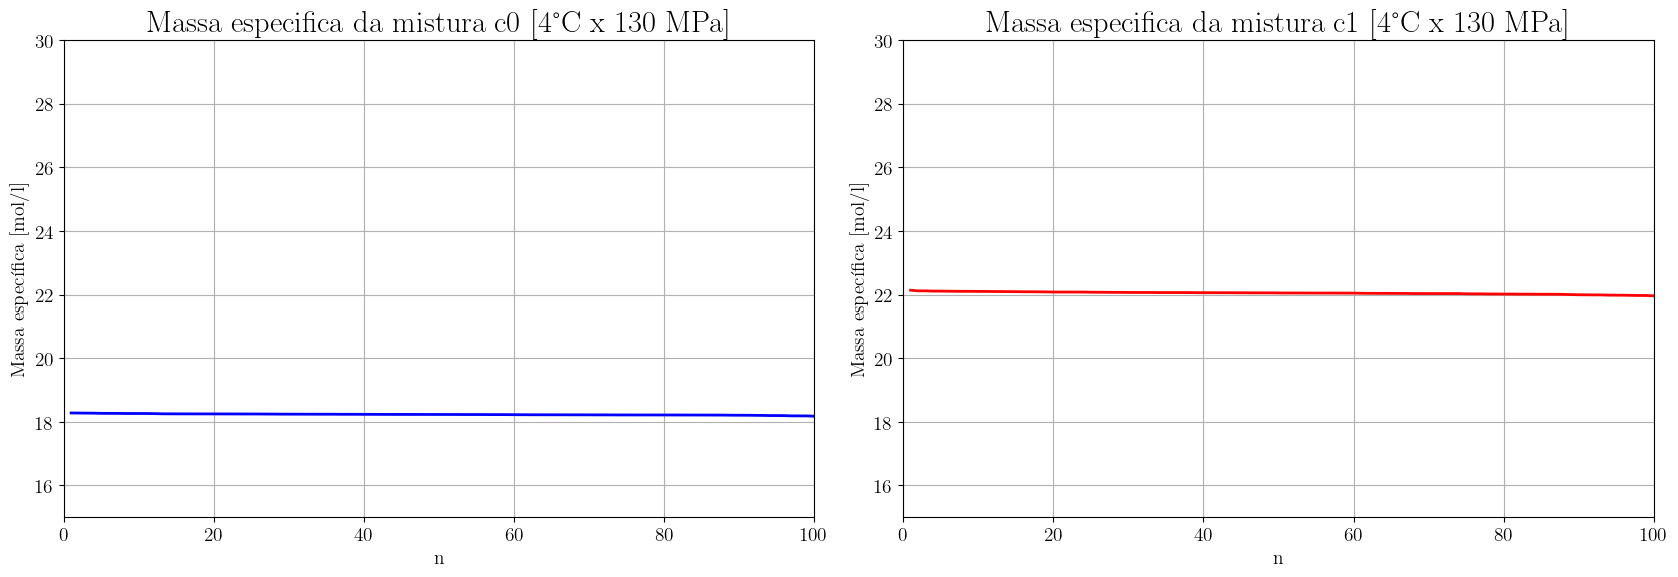

In [118]:
# Ploting a overview for de
fig, ax = plt.subplots(1, 2, figsize=(17,6))
ax[0].plot(x, rho_n4_130[0], 'b', linewidth=2, label ='c0') 
ax[0].grid(visible=True, which='major', axis='both')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([15, 30])
ax[0].set_xlabel('n')
ax[0].set_ylabel('Massa específica [mol/l]')
ax[0].set_title('Massa especifica da mistura c0 [4°C x 130 MPa]')

ax[1].plot(x,rho_n4_115[1], 'r',linewidth=2, label ='c1') 
ax[1].grid(visible=True, which='major', axis='both')
ax[1].set_xlim([0, 100])
ax[1].set_ylim([15, 30])
ax[1].set_xlabel('n')
ax[1].set_ylabel('Massa específica [mol/l]')
ax[1].set_title('Massa especifica da mistura c1 [4°C x 130 MPa]')

plt.show()

In [119]:
# Evaluating r
r_04 = []
for i in range(len(rho_standard)):
    r_04.append( rho_n4_130[i]/rho_standard[i])

# Evaluating u_r
ur_04 = []
for i in range(0,len(c)):
    ur_04.append(np.std(r_04[i]))

# For confidence = 95% → 1,96
r95_04 =[[] for _ in range(0,len(c))]
for i in range(len(r_04)):
    for j in range(len(r_04[i])):
        if r_04[i][j] > (np.mean(r_04[i])-1.96*np.std(r_04[i])) or r_04[i][j] < (np.mean(r_04[i])+1.96*np.std(r_04[i])):
            r95_04[i].append(r_04[i][j])

# Evaluating the uncertaninty portion
u_04 = []
for i in range(0,len(c)):
    u_04.append(np.sqrt(np.std(r_04[i])/np.mean(r95_04[i])))

In [127]:
print('Incerteza de rho para c0 =', round(np.std(rho_n4_130[0]),2))
print('Incerteza de rho para c1 =', round(np.std(rho_n4_130[1]),2))

Incerteza de rho para c0 = 0.02
Incerteza de rho para c1 = 0.03


In [128]:
print('Incerteza de r04 para c0 =', round(ur_04[0],2))
print('Incerteza de r04 para c1 =', round(ur_04[1],2))

Incerteza de r04 para c0 = 0.5
Incerteza de r04 para c1 = 0.8


In [122]:
print('Incerteza relativa de r04 para c0 =', round(u_04[0]*100,2),'%')
print('Incerteza relativa de r04 para c1 =', round(u_04[1]*100,2),'%')

Incerteza relativa de r04 para c0 = 3.38 %
Incerteza relativa de r04 para c1 = 3.83 %


Text(0.5, 1.0, 'c1')

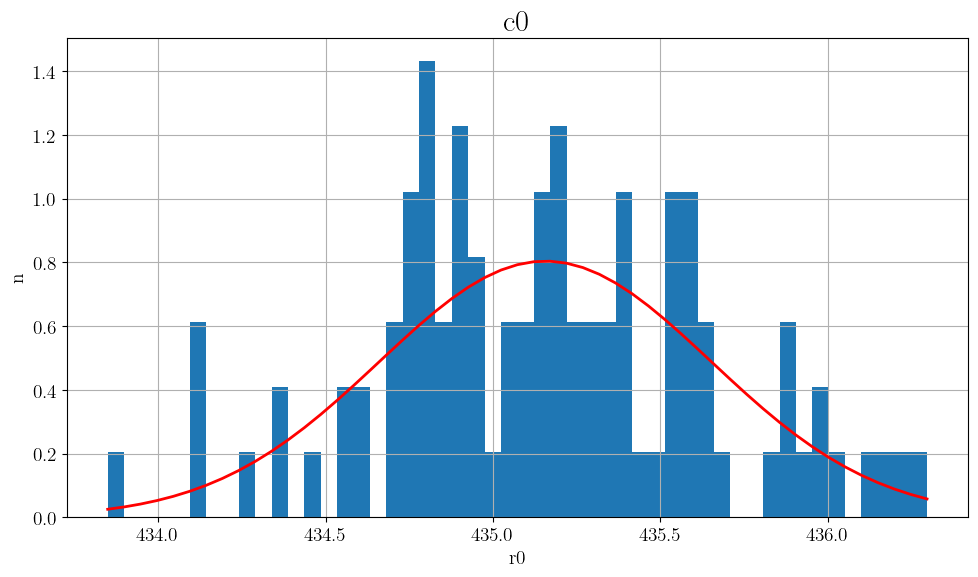

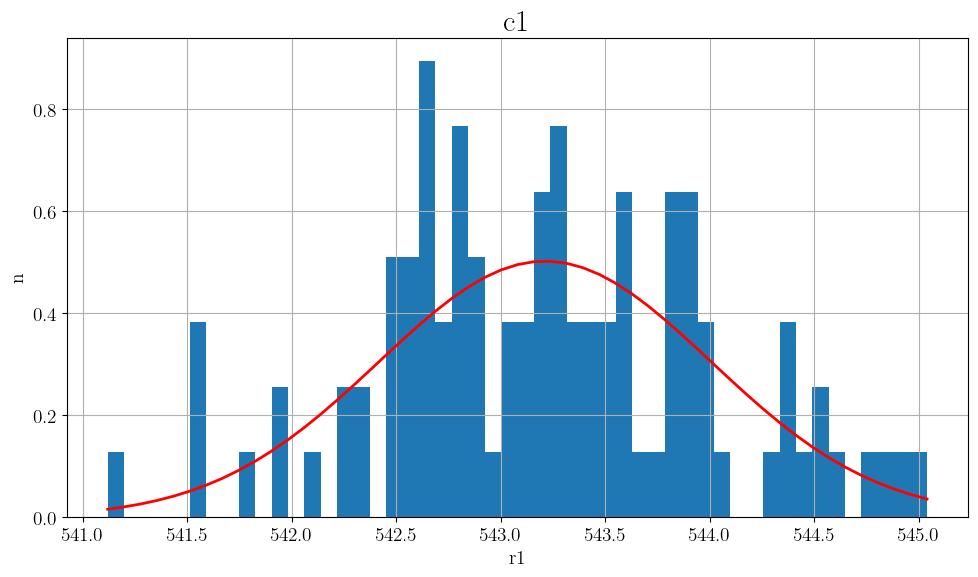

In [121]:

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_04[0])
sigma = np.std(r95_04[0])
count, bins, ignored = plt.hist(r95_04[0], 50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c0') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r0')
ax.set_ylabel('n')
ax.set_title('c0')

fig, ax = plt.subplots(1, 1, figsize=(10,6))

mu = np.mean(r95_04[1])
sigma = np.std(r95_04[1])
count, bins, ignored = plt.hist(r95_04[1],50, density=True)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r', label='c1') 
ax.grid(visible=True, which='major', axis='both')
#ax[0].set_xlim([0, 100])
#ax[0].set_ylim([16, 20])
ax.set_xlabel('r1')
ax.set_ylabel('n')
ax.set_title('c1')